In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing the data
data = pd.read_csv("D:/UTD_JSOM/Spring 2018/Practicum/Top Walker/LuminateDataExport_UTDP2_011818.csv",header=0)
data.columns

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,12,17,20,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['City', 'Company_Goal', 'Company_Name', 'Event_Month', 'Event_Date',
       'Event_Year', 'Event_Year.1', 'Fundraising_Goal', 'Name', 'State1',
       'Participant_Id', 'State', 'Street', 'Team_Average', 'Team_Captain',
       'Team_Count', 'Team_Id', 'Team_Member_Goal', 'Team_Name',
       'Team_Total_Gifts', 'Zip', 'Gifts_Count', 'Registration_Gift',
       'Participant_Gifts', 'Personal_Gift', 'Total_Gifts', 'MATCH_CODE',
       'TAP_LEVEL', 'TAP_DESC', 'TAP_LIFED', 'MEDAGE_CY', 'DIVINDX_CY',
       'MEDHINC_CY', 'MEDDI_CY', 'MEDNW_CY'],
      dtype='object')

In [3]:
data.isnull().sum()

City                  18566
Company_Goal         196611
Company_Name         196611
Event_Month               2
Event_Date                2
Event_Year                2
Event_Year.1              2
Fundraising_Goal          2
Name                      2
State1                36082
Participant_Id            2
State                   858
Street                18566
Team_Average              2
Team_Captain              2
Team_Count                2
Team_Id                   2
Team_Member_Goal       2940
Team_Name              2940
Team_Total_Gifts          2
Zip                   18566
Gifts_Count               2
Registration_Gift         2
Participant_Gifts         2
Personal_Gift             2
Total_Gifts               2
MATCH_CODE                2
TAP_LEVEL                 2
TAP_DESC              20565
TAP_LIFED             21003
MEDAGE_CY                 2
DIVINDX_CY                2
MEDHINC_CY                2
MEDDI_CY                  2
MEDNW_CY                  2
dtype: int64

In [6]:
from pandasql import *
import pandas as pd


In [7]:
#removing the missing values
pysqldf = lambda q: sqldf(q, globals())

q = '''
select * from data 
where TAP_LIFED not null;
'''

data1 = pysqldf(q)

In [9]:
#Finding the total missing values.
data1.isnull().sum()

City                      0
Company_Goal         175729
Company_Name         175729
Event_Month               0
Event_Date                0
Event_Year                0
Event_Year.1              0
Fundraising_Goal          0
Name                      0
State1                32924
Participant_Id            0
State                     0
Street                    0
Team_Average              0
Team_Captain              0
Team_Count                0
Team_Id                   0
Team_Member_Goal       2383
Team_Name              2383
Team_Total_Gifts          0
Zip                       0
Gifts_Count               0
Registration_Gift         0
Participant_Gifts         0
Personal_Gift             0
Total_Gifts               0
MATCH_CODE                0
TAP_LEVEL                 0
TAP_DESC                  0
TAP_LIFED                 0
MEDAGE_CY                 0
DIVINDX_CY                0
MEDHINC_CY                0
MEDDI_CY                  0
MEDNW_CY                  0
dtype: int64

In [138]:
# Dropping the insignificant variables 
aha = data1.drop(['City', 'Company_Goal', 'Company_Name', 'Event_Month', 'Event_Date',
       'Event_Year', 'Event_Year.1', 'State1',
       'Participant_Id', 'State', 'Street', 'Team_Id', 'Team_Name'],axis=1)

In [139]:
aha.isnull().sum()

Fundraising_Goal        0
Name                    0
Team_Average            0
Team_Captain            0
Team_Count              0
Team_Member_Goal     2383
Team_Total_Gifts        0
Zip                     0
Gifts_Count             0
Registration_Gift       0
Participant_Gifts       0
Personal_Gift           0
Total_Gifts             0
MATCH_CODE              0
TAP_LEVEL               0
TAP_DESC                0
TAP_LIFED               0
MEDAGE_CY               0
DIVINDX_CY              0
MEDHINC_CY              0
MEDDI_CY                0
MEDNW_CY                0
dtype: int64

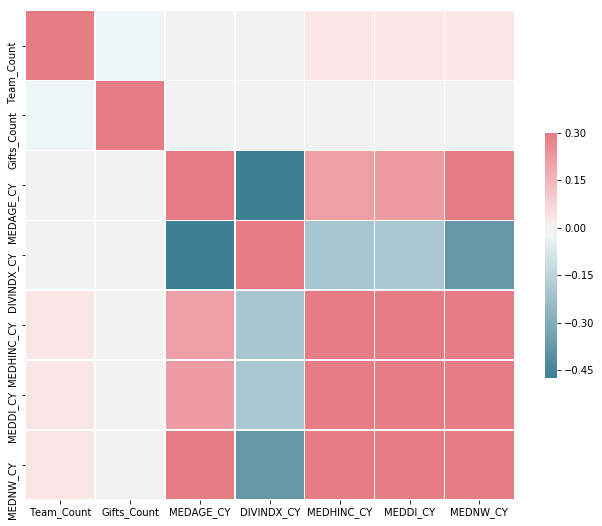

In [15]:
# Finding the correlation between the variables.

import seaborn as sns
import matplotlib.pyplot as plt


corr = aha.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [140]:
# Imputing the missing value with '0'.
aha['Team_Member_Goal'].fillna(0,inplace=True)

In [141]:
# Finding the data type of the variable.
aha['Team_Member_Goal'].dtype

dtype('O')

In [142]:
# Replacing the string value to numeric value 
aha['Team_Member_Goal'] = aha['Team_Member_Goal'].replace(to_replace='1,000',value=1000)
aha['Team_Member_Goal'] = aha['Team_Member_Goal'].replace(to_replace='3,000',value=3000)
aha['Team_Member_Goal'] = pd.to_numeric(aha['Team_Member_Goal'])
aha['Team_Member_Goal'].dtype

dtype('float64')

In [143]:
#aha['Name'] = aha['Name'].replace(to_replace=['^Heart.*'],value=['Heart Walk'],regex=True)

In [144]:
#aha['Name'] = aha['Name'].replace(['.*(?=HW|Heart).*'],['Heart Walk'],regex=True)

In [145]:
# Replacing the string value to numeric value 

obj = ['Total_Gifts','Fundraising_Goal','Team_Average','Team_Count','Team_Total_Gifts','Participant_Gifts','Personal_Gift']

for i in obj:
    aha[i] = aha[i].replace([','],"",regex=True)
    aha[i] = pd.to_numeric(aha[i])



In [148]:
# Creating a Top Walker Indicator
q = '''
select *,case when Total_Gifts < 1000 then 'NTW'
              else 'TW' end as Walker_Ind
              from aha;
'''

aha_ind = pysqldf(q)

In [196]:
q = '''
select Walker_Ind, count(Walker_Ind) as Count
from aha_ind
group by Walker_Ind;
'''
apriori_stats = pysqldf(q)
apriori_stats

,Walker_Ind,Count
0,NTW,161227
1,TW,14651


In [200]:
apriori_stats_acc = apriori_stats.iloc[0,1]/apriori_stats['Count'].sum()
print("The apriori accuracy : ",apriori_stats_acc*100)

The apriori accuracy :  91.6697938344


In [216]:
col = pd.DataFrame(aha_ind.dtypes)
col.reset_index()
aha.shape

(175878, 22)

In [162]:
# Changing the categorical variable to numeric 

from sklearn.preprocessing import LabelEncoder

categorical = ['Team_Captain','Registration_Gift','TAP_LIFED']

for i in categorical:
    le = LabelEncoder()
    aha_ind[i] = le.fit_transform(aha_ind[i]) + 1

In [164]:
# Creating train and test data 
from sklearn.model_selection import train_test_split

aha_ind_train = aha_ind.iloc[:,[0,2,3,4,5,8,9,10,11,16,17,18,19,20,21]]
aha_ind_test = aha_ind.iloc[:,22]
aha_train_x , aha_test_x , aha_train_y , aha_test_y = train_test_split(aha_ind_train,aha_ind_test,test_size=0.33,
                                                                      random_state=100)

In [166]:
# Creating a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i in np.arange(2,10,1):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(aha_train_x,aha_train_y)
    pred = tree_clf.predict(aha_test_x)
    acc = accuracy_score(aha_test_y,pred)
    print("The accuracy at depth ",i,": ",acc)

The accuracy at depth  2 :  0.991523087526
The accuracy at depth  3 :  0.993917987595
The accuracy at depth  4 :  0.995830461751
The accuracy at depth  5 :  0.997105444521
The accuracy at depth  6 :  0.99877670572
The accuracy at depth  7 :  0.999207443143
The accuracy at depth  8 :  0.999328049621
The accuracy at depth  9 :  0.999465885596


In [171]:
# Checking the importance of the features 
col = np.array(aha_ind_train.columns)
imp = np.array((tree_clf.feature_importances_)*100000)
imp_feature = np.stack((col,imp),axis=1)
imp_feature

In [182]:
# Creating Confusion Matrix

from sklearn.metrics import confusion_matrix

con = confusion_matrix(aha_test_y,pred)
con

array([[53216,    18],
       [   13,  4793]], dtype=int64)

In [184]:
from sklearn.model_selection import cross_val_score

cross_val_score(DecisionTreeClassifier(max_depth=6),aha_train_x,aha_train_y, cv=10,scoring='accuracy')

array([ 0.99906661,  0.99847263,  0.99847263,  0.9995757 ,  0.99898167,
        0.99932106,  0.99881185,  0.99855724,  0.99855724,  0.99872698])

### As the accuracy is too high, therefore we can see that there is some problem. Actually we have included highly correlated variable i.e participant gifts and personal gifts. Hence in the further model we have removed these variables.

In [218]:
aha_ind_train = aha_ind.iloc[:,[0,2,3,4,5,8,9,16,17,18,19,20,21]]
aha_ind_test = aha_ind.iloc[:,22]

from sklearn.model_selection import train_test_split

aha_train_x , aha_test_x , aha_train_y , aha_test_y = train_test_split(aha_ind_train,aha_ind_test,test_size=0.33,
                                                                      random_state=101)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i in np.arange(2,10,1):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(aha_train_x,aha_train_y)
    pred = tree_clf.predict(aha_test_x)
    acc = accuracy_score(aha_test_y,pred)
    print("The accuracy at depth ",i,": ",acc)
    
train_pred = tree_clf.predict(aha_train_x)
train_acc = accuracy_score(aha_train_y,train_pred)
print("The accuracy of training : ",train_acc)

The accuracy at depth  2 :  0.94605444521
The accuracy at depth  3 :  0.95049965541
The accuracy at depth  4 :  0.953308063405
The accuracy at depth  5 :  0.954651964163
The accuracy at depth  6 :  0.956977946244
The accuracy at depth  7 :  0.957994486561
The accuracy at depth  8 :  0.958873190903
The accuracy at depth  9 :  0.959131633356
The accuracy of training :  0.96434087476


In [ ]:
from sklearn.metrics import 

In [ ]:
# Checking the feature importance
col = np.array(aha_ind_train.columns)
imp = np.array((tree_clf.feature_importances_)*100000)
imp_feature = np.stack((col,imp),axis=1)
imp_feature

In [191]:
# SGD Classifier
aha_ind_train = aha_ind.iloc[:,[0,2,3,4,5,8,9,16,17,18,19,20,21]]
aha_ind_test = aha_ind.iloc[:,22]

from sklearn.model_selection import train_test_split

aha_train_x , aha_test_x , aha_train_y , aha_test_y = train_test_split(aha_ind_train,aha_ind_test,test_size=0.33,
                                                                      random_state=101)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=111)
sgd_clf.fit(aha_train_x,aha_train_y)
pred = sgd_clf.predict(aha_test_x)
print(accuracy_score(aha_test_y,pred))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.926636802205


In [193]:
# Created Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score


for i in np.arange(2,10,1):
    ran_clf = RandomForestClassifier(max_depth=i)
    ran_clf.fit(aha_train_x,aha_train_y)
    pred = ran_clf.predict(aha_test_x)
    acc = accuracy_score(aha_test_y,pred)
    print("The accuracy at depth ",i,": ",acc)

The accuracy at depth  2 :  0.9294452102
The accuracy at depth  3 :  0.94133356306
The accuracy at depth  4 :  0.948483804273
The accuracy at depth  5 :  0.951240523777
The accuracy at depth  6 :  0.956581667815
The accuracy at depth  7 :  0.957718814611
The accuracy at depth  8 :  0.959527911785
The accuracy at depth  9 :  0.959045485872


### Treating the class imbalances with SMOTE

In [219]:

from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.metrics import (geometric_mean_score,
                              make_index_balanced_accuracy)


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


aha_ind_train = aha_ind.iloc[:,[0,2,3,4,5,8,9,16,17,18,19,20,21]]
aha_ind_test = aha_ind.iloc[:,22]

RANDOM_STATE = 132

aha_train_x , aha_test_x , aha_train_y , aha_test_y = train_test_split(aha_ind_train,aha_ind_test,test_size=0.33,
                                                                       random_state=RANDOM_STATE)

pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
                            DecisionTreeClassifier(max_depth=6,random_state=RANDOM_STATE))

pipeline.fit(aha_train_x, aha_train_y)

pred = pipeline.predict(aha_test_x)

# Calculating training accuracy 
train_pred = pipeline.predict(aha_train_x)
print("The accuracy in training set : ",accuracy_score(aha_train_y,train_pred))
print("The geometric mean in training set : ",geometric_mean_score(aha_train_y,train_pred))

#Calculating test accuracy

print('The accuracy of test set is {}'.format(accuracy_score(
    aha_test_y,
    pred)))

print('The geometric mean of test set is {}'.format(geometric_mean_score(
    aha_test_y,
    pred)))



The accuracy in training set :  0.931074865493
The geometric mean in training set :  0.872270738933
The accuracy of test set is 0.9323053066850447
The geometric mean of test set is 0.8729174459553775


In [214]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(aha_test_y,pred)
tp,fp,fn,tn = cnf[0,0],cnf[0,1],cnf[1,0],cnf[1,1]

In [215]:
Recall = tp/(tp+fn)

Precision = tp/(tp+tn)

print("Recall : ",Recall)

print("Precision : ",Precision)

tp,fp,fn,tn

Recall :  0.981588009705
Precision :  0.927112786679


(3944, 2988, 941, 50167)

## Recall is finding correctly NTW in predicted NTW and Precision is finding correctly NTW in actual NTW.